# EGU intro figures 

PR for one model and fraction children in population

In [1]:
# necessary:  netcdf4-python, regionmask (automatically imports xarray), Cartopy, openpyxl, statsmodels, openpyxl


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
%matplotlib inline
import os, glob, re 
import math
import xarray as xr
import geopandas as gpd
import regionmask as regionmask
import dask
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1 import AxesGrid

from settings import *
from functions import * 
from plotscript import *

sys.path.append('../population/') # make this a module i can pip install and import ! 
from population_demographics_climate import * # move / rename this when good ! 


/apps/brussel/RL8/skylake-ib/software/Python/3.10.4-GCCcore-11.3.0/lib/python3.10/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
/apps/brussel/RL8/skylake-ib/software/statsmodels/0.13.1-foss-2022a/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
start_message()

flags: {'models': 'ISIMIP3a', 'experiment': 'obsclim', 'metric': 'WBGT', 'method': 'shift_fit', 'time_method': None, 'shift_sigma': True, 'shift_period': None, 'chunk_version': 0, 'var': 'wbgt'}
var: wbgt
VARs: None
indir_p: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3b/InputData/climate/atmosphere/bias-adjusted/global/daily/
indir_s: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3b/SecondaryInputData/climate/atmosphere/bias-adjusted/global/daily/
indir_obs: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3a/InputData/climate/atmosphere/obsclim/global/daily/historical/
indir_counterclim: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3a/InputData/climate/atmosphere/counterclim/global/daily/historical/
GCMs: ['CanESM5', 'CNRM-CM6-1', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0']
datasets: ['GSWP3-W5E5', '20CRv3-ERA5', '20CRv3-W5E5']
lat_chunk: 90
lon_chunk: 120
time_chunk: -1
outdirs: /data/brussel/vo/000/bvo00012/vsc10419/attr-hw/output
fi

In [3]:
# SETTINGS

figdir = os.path.join(figdirs, 'fig_apr24-egu')

flags['models']='ISIMIP3b'
        
dirname = 'output_empirical' # outdirnames['TX99']
dirname

'output_empirical'

## Plot PR of TX99

In [4]:
get_outdir(GCMs[0],metric='TX99', outdirname=dirname,models='ISIMIP3b')

'/data/brussel/vo/000/bvo00012/vsc10419/attr-hw/output/output_empirical/TX99/ISIMIP3b/CanESM5'

In [5]:
glob.glob(os.path.join(get_outdir(GCMs[0],metric='TX99', outdirname=dirname,models='ISIMIP3b'), '*returnperiod_2023.nc'))

['/data/brussel/vo/000/bvo00012/vsc10419/attr-hw/output/output_empirical/TX99/ISIMIP3b/CanESM5/canesm5_r1i1p1f1_w5e5_historical_ssp370_TX99_single-year_returnperiod_2023.nc']

In [6]:
da_PR_TX99 = open_all_PR(GCMs, metric='TX99', outdirname=dirname, models='ISIMIP3b')
da_PR_TX99 = da_PR_TX99 #.expand_dims(time=[np.datetime64(f'{2022}-01-01','Y')]) #.assign_coords(time=2022)
#da_PR_TX99

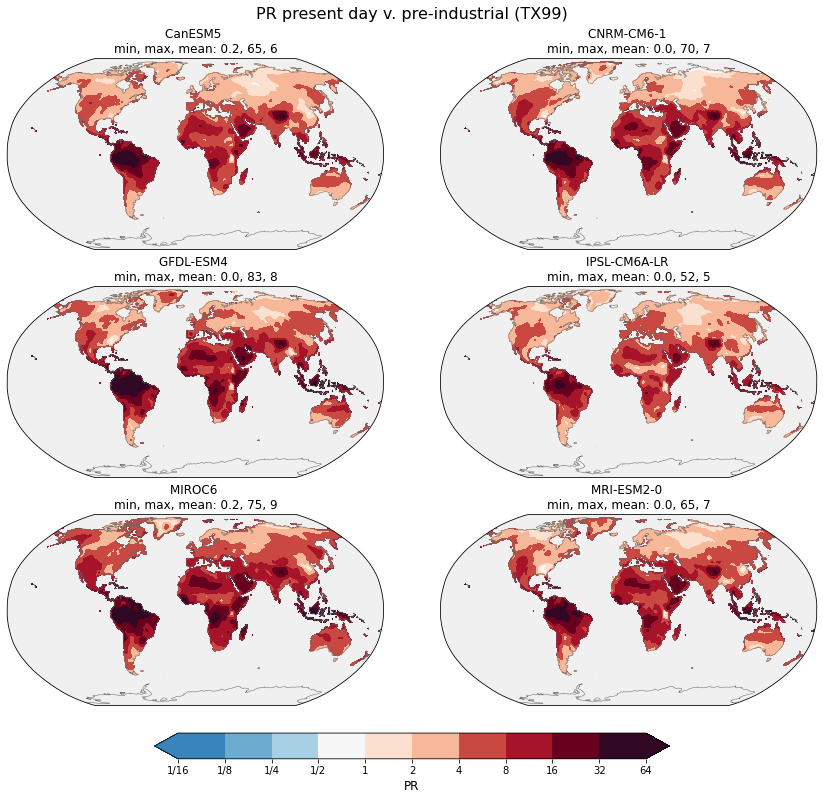

In [7]:
#inputs to functions
bounds, cmap = calc_bounds_cmap_PR_power(7, 'RdBu_r', skew=2)
proj = ccrs.Robinson()

# make figure object
fig, axes = plt.subplots(3,2,figsize=(12,11), subplot_kw={'projection': proj},  layout='constrained')
axes = axes.flatten() 

for GCM, ax in zip(GCMs, axes):
    data_plot = da_PR_TX99.sel(model=GCM)
    plot = plot_PR(data_plot, ax, cmap, bounds, title='summary_stats', smooth=1.8, mask=True)


cbar_lab = 'PR' # try to get TeX interpreter 'less likely $\leftarrow$ PR $\rightarrow$ more likely' #'PR' # add more/less likely arrow 
cbar = fig.colorbar(plot, ticks=bounds, extend='both', ax=axes, shrink=0.6, location='bottom', fraction= 0.045, pad= 0.04) #location='bottom' 
labels = ['1/{}'.format(int(1/t)) if t<1 else str(t) for t in bounds]
cbar.ax.set_xticklabels(labels)
cbar.set_label(label=cbar_lab, size=12) 

fig.suptitle('PR present day v. pre-industrial (TX99)', size=16);

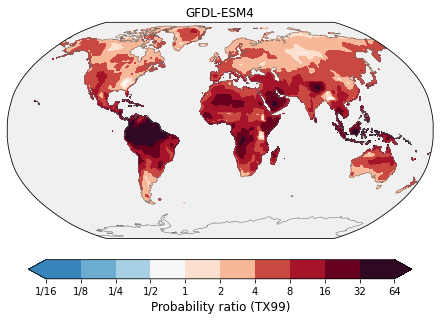

In [8]:
#inputs to functions
bounds, cmap = calc_bounds_cmap_PR_power(7, 'RdBu_r', skew=2)
smooth = 1.2
proj = ccrs.Robinson()

# make figure object
fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'projection': proj},  layout='constrained')

data_plot = da_PR_TX99.isel(model=2)
plot = plot_PR(data_plot, ax, cmap, bounds, title='short', smooth=smooth, mask=True)


cbar_lab = 'Probability ratio (TX99)' # try to get TeX interpreter 'less likely $\leftarrow$ PR $\rightarrow$ more likely' #'PR' # add more/less likely arrow 
cbar = fig.colorbar(plot, ticks=bounds, extend='both', ax=ax,  location='bottom',shrink=0.9) #, fraction= 0.045, pad= 0.04) #location='bottom' 
labels = ['1/{}'.format(int(1/t)) if t<1 else str(t) for t in bounds]
cbar.ax.set_xticklabels(labels)
cbar.set_label(label=cbar_lab, size=12) 

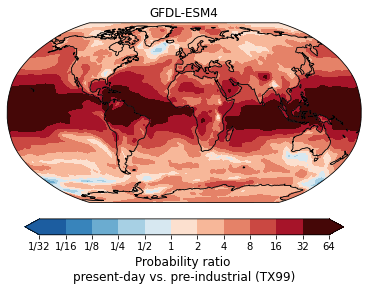

In [9]:
#inputs to functions
bounds, cmap = calc_bounds_cmap_PR_power(7, 'RdBu_r', skew=1)
smooth = 2
proj = ccrs.Robinson()

# make figure object
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': proj},  layout='constrained')

data_plot = da_PR_TX99.isel(model=2)
plot = plot_PR(data_plot, ax, cmap, bounds, title='short', smooth=smooth, mask=False)
ax.coastlines(color='black', linewidth=0.8)

cbar_lab = 'Probability ratio \npresent-day vs. pre-industrial (TX99)' # try to get TeX interpreter 'less likely $\leftarrow$ PR $\rightarrow$ more likely' #'PR' # add more/less likely arrow 
cbar = fig.colorbar(plot, ticks=bounds, extend='both', ax=ax,  location='bottom',shrink=0.9) #, fraction= 0.045, pad= 0.04) #location='bottom' 
labels = ['1/{}'.format(int(1/t)) if t<1 else str(t) for t in bounds]
cbar.ax.set_xticklabels(labels)
cbar.set_label(label=cbar_lab, size=12) 

#plt.savefig(os.path.join(figdir,'isimip3b_PR_TX99_singlemodel_light_lg.png'),dpi=300)

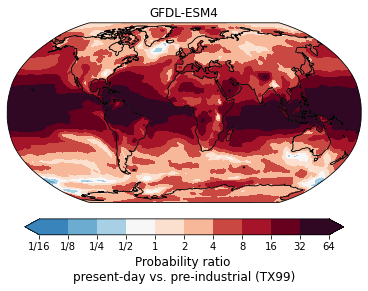

In [10]:
#inputs to functions
bounds, cmap = calc_bounds_cmap_PR_power(7, 'RdBu_r', skew=2)
smooth = 2
proj = ccrs.Robinson()

# make figure object
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': proj},  layout='constrained')

data_plot = da_PR_TX99.isel(model=2)
plot = plot_PR(data_plot, ax, cmap, bounds, title='short', smooth=smooth, mask=False)
ax.coastlines(color='black', linewidth=0.8)

cbar_lab = 'Probability ratio \npresent-day vs. pre-industrial (TX99)' # try to get TeX interpreter 'less likely $\leftarrow$ PR $\rightarrow$ more likely' #'PR' # add more/less likely arrow 
cbar = fig.colorbar(plot, ticks=bounds, extend='both', ax=ax,  location='bottom',shrink=0.9) #, fraction= 0.045, pad= 0.04) #location='bottom' 
labels = ['1/{}'.format(int(1/t)) if t<1 else str(t) for t in bounds]
cbar.ax.set_xticklabels(labels)
cbar.set_label(label=cbar_lab, size=12) 

#plt.savefig(os.path.join(figdir,'isimip3b_PR_TX99_singlemodel_dark_lg.png'),dpi=300)

## Demographics plot 

In [11]:
d_countries = preprocess_all_country_population_data()


interpolating cohort sizes per country
after interpolation and mean-preserving correction there are some neg numbers in 10, Azerbaijan, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 98, Libya, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 136, Papua New Guinea, setting them to zero
Aruba small, population not calculated
Antigua and Barbuda small, population not calculated
Bahrain small, population not calculated
Barbados small, population not calculated
Federated States of Micronesia small, population not calculated
Grenada small, population not calculated
Guam small, population not calculated
Saint Lucia small, population not calculated
Macao small, population not calculated
Maldives small, population not calculated
Malta small, population not calculated
Singapore small, population not calculated
Tonga small, population not calculated


In [12]:
d_countries.keys()

dict_keys(['info_pop', 'borders', 'population_map', 'birth_years', 'life_expectancy_5', 'cohort_size', 'mask'])

In [13]:
da_nkids = d_countries['cohort_size'].sel(time=2022).sel(ages=slice(0,17)).sum(axis=1) #.to_pandas()
da_nkids

<xarray.DataArray 'cohort_size' (country: 191)>
array([2.16192189e+01, 2.02922597e+04, 1.74566991e+04, 5.72076709e+02,
       1.64418486e+03, 1.31045179e+04, 6.77376112e+02, 2.84578858e+01,
       5.68840198e+03, 1.49273782e+03, 2.69252235e+03, 5.93965079e+03,
       2.33867286e+03, 5.94178875e+03, 1.10573799e+04, 5.48617368e+04,
       1.15429955e+03, 3.65495070e+02, 9.95975056e+01, 5.47352299e+02,
       1.86613980e+03, 1.41759450e+02, 4.21487291e+03, 5.34546496e+04,
       5.97551528e+01, 1.18439284e+02, 2.55639867e+02, 8.69870087e+02,
       2.41898789e+03, 7.23199322e+03, 1.57100535e+03, 4.29605624e+03,
       2.82175188e+05, 1.26764262e+04, 1.25660802e+04, 4.76148643e+04,
       2.74623429e+03, 1.36196457e+04, 4.01701538e+02, 1.94933318e+02,
       1.26372153e+03, 2.08307073e+03, 2.44736483e+02, 1.93596653e+03,
       1.29703092e+04, 3.66623130e+02, 1.15145877e+03, 3.74232946e+03,
       1.47046930e+04, 5.66127429e+03, 3.97212146e+04, 2.57854588e+03,
       7.88165326e+03, 2.53558185e+02, 5.31790251e+04, 1.09802725e+03,
       2.97125007e+02, 1.41216860e+04, 4.09756211e+01, 8.91187772e+02,
       1.44559412e+04, 8.40930205e+02, 1.38224221e+04, 6.70861789e+03,
       1.17126142e+03, 9.49781065e+02, 5.95071594e+02, 1.87420708e+03,
       3.25075007e+01, 7.18831525e+03, 4.76273855e+01, 2.51911190e+02,
       1.11949503e+03, 3.51238476e+03, 7.21520088e+02, 4.27056371e+03,
       1.62033504e+03, 8.40289382e+04, 4.36096686e+05, 1.21117242e+03,
...
       1.11280014e+04, 7.48925573e+01, 1.62901210e+04, 1.31908103e+02,
       1.10781328e+03, 1.62650253e+04, 2.16262184e+03, 2.61962451e+02,
       1.08227492e+04, 9.56850988e+03, 1.14788492e+03, 7.45282215e+01,
       1.42721804e+04, 1.05960486e+05, 2.15344468e+03, 3.33780926e+03,
       1.15654269e+03, 1.08485630e+04, 1.11557167e+03, 1.27035694e+03,
       8.48091626e+04, 1.33929667e+03, 1.04785322e+04, 4.00793452e+04,
       3.55821888e+03, 6.80877788e+03, 7.45562485e+02, 5.97047671e+03,
       1.60607772e+03, 2.41632122e+03, 2.41529334e+03, 7.92568424e+01,
       4.68653324e+02, 3.39541310e+03, 2.97435786e+04, 6.19555171e+03,
       1.05266871e+04, 2.04649023e+04, 8.53845648e+03, 1.01807068e+03,
       2.87610625e+02, 3.89557824e+03, 2.05220209e+03, 8.83048604e+03,
       1.66465952e+03, 6.81379284e+03, 1.03164074e+02, 1.72231038e+02,
       9.99261909e+02, 3.74902387e+02, 2.15518845e+03, 6.13438053e+02,
       7.83096400e+03, 8.87043299e+03, 3.91824782e+03, 1.37957158e+04,
       3.83128658e+03, 2.21350892e+03, 7.30731994e+02, 4.25994501e+01,
       3.15065825e+02, 3.30775077e+03, 2.33064025e+04, 3.28173574e+04,
       2.68022776e+04, 8.11013491e+03, 8.40220450e+02, 7.50455072e+04,
       1.08497657e+04, 2.88104279e+01, 1.05166060e+04, 2.44711993e+01,
       2.60560570e+04, 1.18467574e+02, 8.02021672e+01, 1.44246238e+04,
       1.97411373e+04, 1.00014506e+04, 8.27709648e+03])
Coordinates:
  * country  (country) <U32 'Aruba' 'Afghanistan' ... 'Zambia' 'Zimbabwe'
    time     int64 2022

In [14]:
da_npop = d_countries['cohort_size'].sel(time=2022).sum(dim='ages') #.to_pandas()
da_npop

<xarray.DataArray 'cohort_size' (country: 191)>
array([1.06160000e+02, 4.13012000e+04, 3.41966200e+04, 2.84814000e+03,
       1.04310000e+04, 4.61967800e+04, 2.86590000e+03, 1.04500000e+02,
       2.56501000e+04, 8.83356000e+03, 1.01134000e+04, 1.19863600e+04,
       1.15656200e+04, 1.26033000e+04, 2.19666800e+04, 1.74656920e+05,
       6.73366000e+03, 1.55422000e+03, 4.15940000e+02, 3.28242000e+03,
       9.32400000e+03, 4.00660000e+02, 1.18284000e+04, 2.16889100e+05,
       2.78080000e+02, 4.58060000e+02, 8.55260000e+02, 2.47178000e+03,
       5.12916000e+03, 3.78503000e+04, 8.68840000e+03, 1.85681000e+04,
       1.42036782e+06, 2.71000400e+04, 2.67618200e+04, 9.33869200e+04,
       5.92266000e+03, 5.10711800e+04, 9.05780000e+02, 5.71020000e+02,
       5.15154000e+03, 1.13292200e+04, 1.22258000e+03, 1.05692000e+04,
       8.14377000e+04, 1.05622000e+03, 5.81478000e+03, 1.13706200e+04,
       4.40974400e+04, 1.77404400e+04, 1.05506580e+05, 5.62210000e+03,
       4.68263000e+04, 1.30074000e+03, 1.18460920e+05, 5.54912000e+03,
       9.19980000e+02, 6.64344200e+04, 1.09620000e+02, 2.23210000e+03,
       6.75529200e+04, 3.69028000e+03, 3.19705800e+04, 1.42456000e+04,
       2.37676000e+03, 2.03954000e+03, 1.39680000e+03, 1.11594800e+04,
       1.05120000e+02, 1.83626600e+04, 1.69580000e+02, 7.50940000e+02,
       7.57216000e+03, 1.00006600e+04, 4.09844000e+03, 1.16490000e+04,
       9.52800000e+03, 2.76134000e+05, 1.40848684e+06, 4.92706000e+03,
...
       2.12267000e+04, 4.29600000e+02, 5.49358800e+04, 6.28180000e+02,
       3.25800000e+03, 3.32224600e+04, 4.90278000e+03, 1.25578000e+03,
       2.17595000e+04, 3.39086400e+04, 2.78222000e+03, 2.89180000e+02,
       2.56200400e+04, 2.15527140e+05, 6.57406000e+03, 1.73241800e+04,
       5.45152000e+03, 3.13601000e+04, 4.86964000e+03, 4.79060000e+03,
       2.16356920e+05, 4.34688000e+03, 3.38706600e+04, 1.12304400e+05,
       8.97664000e+03, 3.78666600e+04, 3.64150000e+03, 2.57778800e+04,
       1.01120000e+04, 7.26798000e+03, 5.46542000e+03, 2.98580000e+02,
       2.86372000e+03, 1.89399800e+04, 1.42582820e+05, 1.37876000e+04,
       3.58101000e+04, 4.48371200e+04, 1.79832200e+04, 5.94706000e+03,
       6.79920000e+02, 8.36718000e+03, 6.54326000e+03, 1.70763400e+04,
       8.56732000e+03, 1.48062800e+04, 2.22000000e+02, 5.67520000e+02,
       5.41762000e+03, 2.09884000e+03, 1.01706400e+04, 1.46958000e+03,
       2.01909400e+04, 1.70906200e+04, 8.62678000e+03, 6.99195200e+04,
       9.70884000e+03, 6.20706000e+03, 1.47690000e+03, 1.07540000e+02,
       1.33786000e+03, 1.20097800e+04, 8.36948600e+04, 6.61710400e+04,
       5.03955800e+04, 4.32108200e+04, 3.45710000e+03, 3.35964740e+05,
       3.39354800e+04, 1.05300000e+02, 3.39391600e+04, 1.05940000e+02,
       9.92308600e+04, 3.00200000e+02, 1.98760000e+02, 3.20865600e+04,
       5.98726400e+04, 1.99201000e+04, 1.81965200e+04])
Coordinates:
  * country  (country) <U32 'Aruba' 'Afghanistan' ... 'Zambia' 'Zimbabwe'
    time     int64 2022

In [15]:
df_fraction_kids = (da_nkids / da_npop).to_pandas()
df_fraction_kids.name = 'fraction_children'
df_fraction_kids

country
Aruba                   0.203648
Afghanistan             0.491324
Angola                  0.510480
Albania                 0.200860
United Arab Emirates    0.157625
                          ...   
Samoa                   0.403513
Yemen                   0.449553
South Africa            0.329719
Zambia                  0.502078
Zimbabwe                0.454872
Name: fraction_children, Length: 191, dtype: float64

In [16]:
d_countries['borders'] #.plot()

,geometry,abbreviation,region
name,,,
Aruba,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",ABW,Latin America & Caribbean
Afghanistan,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",AFG,South Asia
Angola,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...",AGO,Sub-Saharan Africa
Albania,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",ALB,Europe & Central Asia
United Arab Emirates,"MULTIPOLYGON (((56.27906 25.62745, 56.30030 25...",ARE,Middle East & North Africa
...,...,...,...
Samoa,"MULTIPOLYGON (((-172.20104 -13.59254, -172.197...",WSM,East Asia & Pacific
Yemen,"MULTIPOLYGON (((51.97861 18.99564, 51.98569 18...",YEM,Middle East & North Africa
South Africa,"MULTIPOLYGON (((19.98145 -24.75249, 19.98641 -...",ZAF,Sub-Saharan Africa


In [17]:
gdf_countries = pd.merge(d_countries['borders'], df_fraction_kids, left_index=True, right_index=True)
gdf_countries

,geometry,abbreviation,region,fraction_children
Aruba,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",ABW,Latin America & Caribbean,0.203648
Afghanistan,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",AFG,South Asia,0.491324
Angola,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...",AGO,Sub-Saharan Africa,0.510480
Albania,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",ALB,Europe & Central Asia,0.200860
United Arab Emirates,"MULTIPOLYGON (((56.27906 25.62745, 56.30030 25...",ARE,Middle East & North Africa,0.157625
...,...,...,...,...
Samoa,"MULTIPOLYGON (((-172.20104 -13.59254, -172.197...",WSM,East Asia & Pacific,0.403513
Yemen,"MULTIPOLYGON (((51.97861 18.99564, 51.98569 18...",YEM,Middle East & North Africa,0.449553
South Africa,"MULTIPOLYGON (((19.98145 -24.75249, 19.98641 -...",ZAF,Sub-Saharan Africa,0.329719
Zambia,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629...",ZMB,Sub-Saharan Africa,0.502078


In [18]:
gdf_countries.sort_values('fraction_children').head(20)

,geometry,abbreviation,region,fraction_children
Hong Kong,"MULTIPOLYGON (((114.22983 22.55581, 114.23471 ...",HKG,East Asia & Pacific,0.147844
Japan,"MULTIPOLYGON (((129.78321 31.79963, 129.79086 ...",JPN,East Asia & Pacific,0.149862
Republic of Korea,"MULTIPOLYGON (((128.36492 38.62434, 128.39478 ...",KOR,East Asia & Pacific,0.157433
United Arab Emirates,"MULTIPOLYGON (((56.27906 25.62745, 56.30030 25...",ARE,Middle East & North Africa,0.157625
Italy,"MULTIPOLYGON (((7.02208 45.92526, 7.06694 45.8...",ITA,Europe & Central Asia,0.158510
Portugal,"MULTIPOLYGON (((-7.10486 38.82719, -7.15101 38...",PRT,Europe & Central Asia,0.158829
Germany,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48...",DEU,Europe & Central Asia,0.159267
Qatar,"POLYGON ((50.80787 24.74665, 50.82667 24.74868...",QAT,Middle East & North Africa,0.163652
Macao,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...",MAC,East Asia & Pacific,0.165462
Bosnia and Herzegovina,"POLYGON ((17.65333 42.89094, 17.65284 42.89118...",BIH,Europe & Central Asia,0.166753


In [19]:
gdf_countries.sort_values('fraction_children').tail(20)

,geometry,abbreviation,region,fraction_children
Benin,"POLYGON ((3.59640 11.69577, 3.57439 11.67304, ...",BEN,Sub-Saharan Africa,0.471447
Central African Republic,"POLYGON ((22.86106 10.91915, 22.86323 10.89182...",CAF,Sub-Saharan Africa,0.471615
Senegal,"POLYGON ((-12.26413 14.77494, -12.25651 14.745...",SEN,Sub-Saharan Africa,0.474801
Mozambique,"MULTIPOLYGON (((32.11388 -26.84001, 32.11740 -...",MOZ,Sub-Saharan Africa,0.489579
Afghanistan,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",AFG,South Asia,0.491324
Nigeria,"MULTIPOLYGON (((3.59640 11.69577, 3.64777 11.7...",NGA,Sub-Saharan Africa,0.491634
The Gambia,"POLYGON ((-16.75365 13.06501, -16.76887 13.077...",GMB,Sub-Saharan Africa,0.492798
Timor-Leste,"MULTIPOLYGON (((124.45053 -9.18019, 124.45150 ...",TLS,East Asia & Pacific,0.494774
Burundi,"POLYGON ((30.55460 -2.40063, 30.52148 -2.44228...",BDI,Sub-Saharan Africa,0.495534
Tanzania,"MULTIPOLYGON (((32.92086 -9.40790, 32.90546 -9...",TZA,Sub-Saharan Africa,0.495947


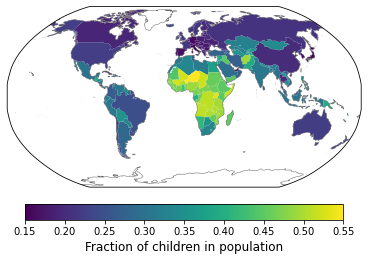

In [20]:
proj = ccrs.Robinson()

fig, ax = plt.subplots(figsize=(5,5),subplot_kw={'projection': proj},  layout='constrained')

ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(color='dimgray', linewidth=0.5)

plot = gdf_countries.to_crs(proj).plot(column='fraction_children', 
                                       ax=ax, 
                                       vmin=0.15,
                                       vmax=0.55
                                       #legend=True,
                                       #scheme='EqualInterval',
                                      #k=6,
                                      #legend_kwds={'interval':'True'}
                                      ) 

foo = ax.collections[0]
cbar = plt.colorbar(foo, ax=ax, location='bottom', shrink=0.9)
#cbar.ax.tick_params(labelsize=12) 
cbar.set_label(label = 'Fraction of children in population',size=12)

#plt.savefig(os.path.join(figdir,'fraction_children_pop.png'),dpi=300)


In [21]:
# rasteroze geopandas 



import rasterio
import numpy as np
import geopandas as gpd
import xarray as xr
from rasterio.features import geometry_mask

gdf = gdf_countries

# Specify raster properties (extent, resolution, etc.)
# Replace these values with your actual raster properties
xmin, ymin, xmax, ymax = gdf.total_bounds
width = 1000
height = 1000
transform = rasterio.transform.from_bounds(xmin, ymin, xmax, ymax, width, height)
# Create an empty xarray DataArray
data_array = xr.DataArray(np.zeros((height, width)), dims=['lat', 'lon'])

# Set the spatial coordinates
data_array['lon'] = np.linspace(xmin, xmax, width)
data_array['lat'] = np.linspace(ymax, ymin, height)

# Initialize the array with NaN
data_array[:] = np.nan

# Iterate over each geometry
for idx, row in gdf.iterrows():
    geom = row.geometry
    value = row['fraction_children']
    
    # Create a mask for the current geometry
    mask = geometry_mask([geom], out_shape=(height, width), transform=transform, invert=True)
    
    # Assign the value to pixels within the geometry
    data_array.values[mask] = value

# Set the coordinate reference system
data_array.attrs['crs'] = str(gdf.crs)

# Optionally, set additional metadata
data_array.attrs['description'] = "Rasterized GeoDataFrame with fraction_children values"


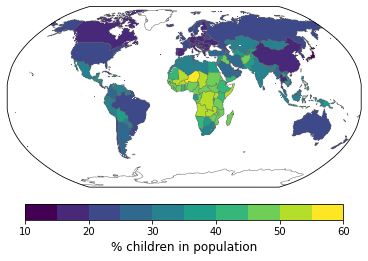

In [27]:
proj = ccrs.Robinson()
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(5,5),subplot_kw={'projection': proj},  layout='constrained')

ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(color='dimgray', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, facecolor="none", edgecolor='dimgray', linewidth=0.5 )

plot = (data_array*100).plot(add_colorbar=False, vmin=10, vmax=60, transform=crs, levels=11)

foo = ax.collections[0]
cbar = plt.colorbar(foo, ax=ax, location='bottom', shrink=0.9, extend='neither')

cbar.set_label(label = '% children in population',size=12)

#plt.savefig(os.path.join(figdir,'fraction_children_pop_discrete_countries_v2.png'),dpi=300)